In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

df = pd.read_csv('dataset_2277.csv')
tyler_df = pd.read_csv('dataset_tyler_1663.csv')

In [6]:
df.sample(5)

,player_name,opp_name,player_elo,opp_elo,elo_diff,color,x-ma5,x-ma20,opp_x-ma5,opp_x-ma20,won
298,alfmi1971,SilichVladislav,1431,1544,-113,False,-13.2,95.45,-12.2,-16.60,1
1973,fischerknight1,slawinskipl,1616,1589,27,True,-15.8,-42.75,-7.0,7.10,1
1141,CleansGambit,kungfiske,1374,1458,-84,False,-6.4,84.65,-1.0,-6.75,0
980,DrTatan,Otexsgaxi,1404,1530,-126,True,14.2,175.95,-2.8,-3.15,1
905,tsavage88,kleiik,1477,1469,8,False,-3.6,-10.30,16.6,19.25,1


In [27]:
tyler_df.sample(5)

,player_name,opp_name,player_elo,opp_elo,elo_diff,color,x-ma5,x-ma20,opp_x-ma5,opp_x-ma20,won
1108,BIG_TONKA_T,richie340,1442,1383,59,False,13.0,-54.85,-9.8,0.20,0
1204,BIG_TONKA_T,BoilerAndy,1332,1301,31,False,4.8,-2.05,16.8,41.60,0
784,BIG_TONKA_T,macaphella,1413,1397,16,True,-3.8,-11.75,-13.0,-39.15,1
1411,BIG_TONKA_T,rajesh_gangam,1402,1449,-47,True,17.4,94.35,5.4,-10.45,1
902,BIG_TONKA_T,kabanjahe51,1543,1631,-88,True,10.0,110.25,7.2,71.75,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [28]:
tyler_df_dropped = tyler_df.dropna()
print(len(tyler_df_dropped))

X = tyler_df_dropped[['x-ma5', 'x-ma20', 'opp_x-ma5', 'opp_x-ma20']]
y = tyler_df_dropped['won']

# Initialize Logistic Regression and KFold
logreg = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')

# Print the average accuracy
print("Average Accuracy:", scores.mean())

1561
Average Accuracy: 0.5291062505120012


1663


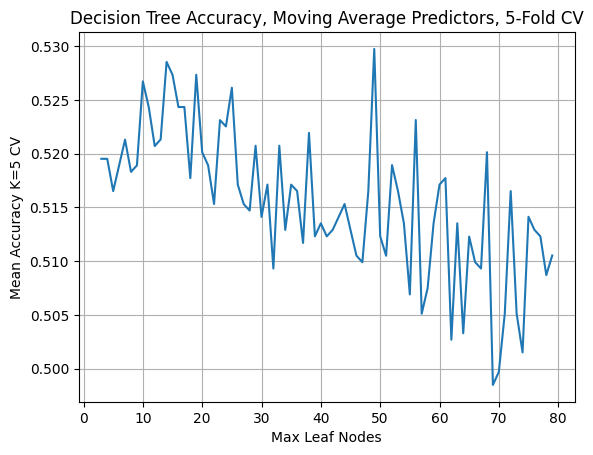

In [30]:
print(len(tyler_df))

X = tyler_df[['x-ma5', 'x-ma20', 'opp_x-ma5', 'opp_x-ma20']]
y = tyler_df['won']

max_leaf_scores = {}

for i in range(3, 80):
    # Initialize Decision Tree Classifier and KFold
    decision_tree = DecisionTreeClassifier(max_leaf_nodes=i)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(decision_tree, X, y, cv=kf, scoring='accuracy')

    # Print the average accuracy
    max_leaf_scores[i] = scores.mean()

plot.plot(max_leaf_scores.keys(), max_leaf_scores.values())
plot.grid()
plot.xlabel('Max Leaf Nodes')
plot.ylabel('Mean Accuracy K=5 CV')
plot.title('Decision Tree Accuracy, Moving Average Predictors, 5-Fold CV')
plot.savefig('ma_decision_tree_acc.png')
plot.show()